In [3]:
# implement custom segment layer, which replaces standard neurons with stream segmenet equation

# see https://link.springer.com/article/10.1007/s00477-008-0248-0 equation 3

In [1]:
#https://xuwd11.github.io/Dropout_Tutorial_in_PyTorch/
%matplotlib inline
import numpy as np
import torch
import torch.optim as optim
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
torch.set_printoptions(edgeitems=2, linewidth=75)

In [7]:
torch.subtract?

Docstring:
subtract(input, other, *, alpha=1, out=None) -> Tensor

Alias for :func:`torch.sub`.
Type:      builtin_function_or_method


In [93]:
x -

<ipython-input-93-e78e5230d07a>:1: RuntimeWarning: invalid value encountered in log
  np.log(-2)


nan

In [84]:
i= 2
o= 5
x = torch.tensor([3, 2])
h = 
#h = torch.Tensor(o, i)
#x = torch.Tensor(i,1)
w = torch.Tensor(o, i)
w = torch.tensor([1,1])
x_t = x - h
#x_t
torch.mul(torch.log(x_t), w)

# set all nans to zero

# sum


tensor([[1.0986,    nan],
        [1.0986,    nan],
        [1.0986,    nan],
        [1.0986,    nan],
        [1.0986,    nan]])

In [87]:
act = nn.ReLU()
act(np.nan)

TypeError: relu(): argument 'input' (position 1) must be Tensor, not float

In [63]:
w.shape

torch.Size([5, 2])

In [43]:
torch.mm(x_t, w.t())

tensor([[0.0000e+00, 0.0000e+00, 4.2039e-45, 1.9323e-20, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 4.2039e-45, 1.9323e-20, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 4.2039e-45, 1.9323e-20, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 4.2039e-45, 1.9323e-20, 0.0000e+00],
        [0.0000e+00, 0.0000e+00, 4.2039e-45, 1.9323e-20, 0.0000e+00]])

In [28]:
i= 1
o= 5

h = torch.Tensor(o, i)
x = torch.Tensor(i,1)
w = torch.Tensor(o, i)
torch.mm(x, w.t())

tensor([[       -inf,        -inf,        -inf,        -inf, -3.9643e+17]])

In [18]:
torch.log()

TypeError: log() missing 1 required positional arguments: "input"

In [ ]:
class RatingLayer(nn.Module):
    """ Mimic structure of stream rating """
    def __init__(self, size_in, size_out, stage_min, stage_max):
        super().__init__()
        self.size_in, self.size_out = size_in, size_out
        weights = torch.Tensor(size_out, size_in)
        self.weights = nn.Parameter(weights)  # nn.Parameter is a Tensor that's a module parameter.
        bias = torch.Tensor(size_out)
        self.bias = nn.Parameter(bias)
        offsets = torch.Tensor(size_out, size_in) #cease-to-flow stage
        self.offsets = nn.Parameter(offsets)

        # initialize weights and biases
        nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5)) # weight init 
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weights)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)  # bias init
        
        # bayesian initialization
        nn.init.uniform_(weights, a=.0, b=1.0)
        nn.init.uniform_(offsets, a=)
        


    def forward(self, x):
        x_t = torch.log(x - h0)
        w_times_x= torch.mm(x_t, self.weights.t())
        return torch.add(w_times_x, self.bias)  # w times x + b

In [180]:
import math

class RatingLayer(nn.Module):
    def __init__(self, width, stage_max):
        super().__init__()
        self.width = width
        self.stage_max = stage_max
        weights = torch.Tensor(width, 1) # can remove widhts if not using kaiming 
        self.weights = nn.Parameter(weights)
        offsets = torch.Tensor(width, 1)
        self.offsets = nn.Parameter(offsets)
        bias = torch.Tensor(width, 1)
        self.bias = nn.Parameter(bias)
        
        # initialize weights and biases
        # bayesian initialization
        nn.init.uniform_(self.offsets, a=.0, b=self.stage_max * 1.2) #
       
        # XXX improve
        nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5)) # weight init 
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weights)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)  # bias init

    
    def forward(self, x):
        #import pdb; pdb.set_trace()
        x_o = torch.relu(x - self.offsets)
        x_ol = torch.relu(torch.log(x_o))
        
        #w_times_x = torch.mm(x_ol, self.weights.t())
        w_times_x = torch.multiply(x_ol, self.weights)
        q_l = torch.sum(torch.add(w_times_x, self.bias))
        return torch.exp(q_l) # - 1
        
        
        

In [221]:
class RatingLayer(nn.Module):
    """ Custom Linear layer but mimics a standard linear layer """
    def __init__(self, size_in, size_out):
        super().__init__()
        self.size_in, self.size_out = size_in, size_out
        weights = torch.Tensor(size_out, size_in)
        self.weights = nn.Parameter(weights)  # nn.Parameter is a Tensor that's a module parameter.
        bias = torch.Tensor(size_out)
        self.bias = nn.Parameter(bias)

        # initialize weights and biases
        nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5)) # weight init
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weights)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)  # bias init

    def forward(self, x):
        import pdb; pdb.set_trace()
        w_times_x= torch.mm(x, self.weights.t())
        out= torch.add(w_times_x, self.bias)  # w times x + b
        return out


In [442]:
# corrected
import math

class RatingLayer(nn.Module):
    def __init__(self, width, stage_max):
        super().__init__()
        self.width = width
        self.stage_max = stage_max
        weights = torch.Tensor(width, 1) # can remove widhts if not using kaiming 
        self.weights = nn.Parameter(weights)
        offsets = torch.Tensor(width, 1)
        self.offsets = nn.Parameter(offsets)
        bias = torch.Tensor(width, 1)
        self.bias = nn.Parameter(bias)
        
        # initialize weights and biases
        # bayesian initialization
        nn.init.uniform_(self.offsets, a=.0, b=self.stage_max * 1.2) #
       
        # XXX improve
        nn.init.kaiming_uniform_(self.weights, a=math.sqrt(5)) # weight init 
        fan_in, _ = nn.init._calculate_fan_in_and_fan_out(self.weights)
        bound = 1 / math.sqrt(fan_in)
        nn.init.uniform_(self.bias, -bound, bound)  # bias init
        
        self.ones = torch.ones(width, 1)
    
    def forward(self, x):
        
        x_o = torch.relu(x - self.offsets.t())
        x_ol = torch.relu(torch.log(x_o))
        #x_ol = torch.log(x_o)
        #import pdb; pdb.set_trace()
        #w_times_x = torch.mm(x_ol, self.weights.t())
        w_times_x = torch.multiply(x_ol, self.weights.t())
        q_l = torch.add(w_times_x, self.bias.t())
        # XXX exp order correct?
        # this way failed
        q = torch.exp(q_l)
        #import pdb; pdb.set_trace()
        return  torch.mm(q, self.ones)
        #return torch.sum(q, 1)
        #XXX try sum then exp
        #q_ls = torch.sum(q_l, 1)
        #return torch.exp(q_ls)

        

In [574]:
# import training data
import  pandas as pd
#data = pd.read_csv('../data/co_channel.csv')
data = pd.read_csv('../data/green_channel.csv')

data.head()

,datetime,stage,q,q_sigma
0,2020-05-21 14:13:41 [UTC-07:00],7.04,12199.342,199.172931
1,2020-04-16 14:55:31 [UTC-07:00],4.43,4921.953,95.425619
2,2020-03-04 13:54:10 [UTC-07:00],2.99,2331.665,61.860500
3,2020-03-04 13:16:51 [UTC-07:00],2.94,2289.220,47.886745
4,2020-01-23 11:04:32 [UTC-07:00],2.96,2408.210,99.522964


In [575]:
#observations
t_s = torch.tensor(data['stage']).float().unsqueeze(1)
t_q = torch.tensor(data['q']).float().unsqueeze(1)

#uncertainties
t_q_sigma = torch.tensor(data['q_sigma']).float().unsqueeze(1)
t_s_sigma = torch.tensor([0.01]).float().unsqueeze(1)

t_q.shape

torch.Size([36, 1])

In [547]:
# smoke test
test = RatingLayer(width=10, stage_max=t_s.max())

test(torch.tensor([10.0]).unsqueeze(1))

tensor([[21.6459]], grad_fn=<MmBackward>)

In [514]:
def MSLELoss(y, x):
    squared_diffs = torch.log(y/x)**2
    return squared_diffs.mean()

In [515]:
def training_loop_noval(n_epochs, optimizer, model, loss_fn, t_y_train,
                  t_x_train):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_x_train) # <1>
        loss_train = loss_fn(t_p_train, t_y_train)

        #t_p_val = model(t_u_val) # <1>
        #loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()
        #print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},")
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},")

In [635]:
def training_loop_constrained_noval(n_epochs, optimizer, model, loss_fn, t_y_train,
                  t_x_train):
    for epoch in range(1, n_epochs + 1):
        t_p_train = model(t_x_train) # <1>
        #loss_train = loss_fn(t_p_train, t_y_train) + model(1.0)/(1e6) #should be zero
        loss_train = loss_fn(t_p_train, t_y_train) + loss_fn(model(1e-6),1e-6)/1e6

        #t_p_val = model(t_u_val) # <1>
        #loss_val = loss_fn(t_p_val, t_c_val)
        
        optimizer.zero_grad()
        loss_train.backward() # <2>
        optimizer.step()
        #print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},")
        if epoch == 1 or epoch % 1000 == 0:
            print(f"Epoch {epoch}, Training loss {loss_train.item():.4f},")

In [626]:
MSLELoss(torch.tensor([1e-6]), 0)

tensor(inf)

In [438]:
#t_sn = t_s/t_s.max()
#t_qn = t_q/t_q.max()

In [612]:
model(2.1)/1e6

tensor([[0.0014]], grad_fn=<DivBackward0>)

In [439]:
torch.log(t_qn)

tensor([[-1.8670],
        [-2.7588],
        [-2.8611],
        [-2.6369],
        [-2.6978],
        [-2.8541],
        [-2.7695],
        [-0.9249],
        [-1.5581],
        [-2.6303],
        [-2.5267],
        [ 0.0000],
        [-0.4106],
        [-0.3292],
        [-0.5522]])

In [ ]:
def MSLELoss(y, x):
    squared_diffs = torch.log(y/x)**2
    return squared_diffs.mean()

def special_MSLELoss(y, x):
    squared_diffs = torch.log(y/x)**2
    return squared_diffs.mean()

In [648]:
#model = RatingLayer(1, 100)
#model = RatingLayer(width=1024, stage_max=t_s.max())
model = RatingLayer(width=4, stage_max=t_s.max())
optimizer = optim.Adam(model.parameters(), weight_decay=1e-6) #weight_decay default was 1e-6 # weight decay sometimes fixes flat lining at low values!# with = 0.0002
optimizer = optim.Adam(model.parameters())
#optimizer = optim.LBFGS(model.parameters())

#optimizer = optim.SGD(model.parameters(), lr=1e-3)
training_loop_noval(
#training_loop_constrained_noval(
    n_epochs = 50000,
    optimizer = optimizer,
    model = model,
    #loss_fn = nn.MSELoss(),
    loss_fn = MSLELoss,
    t_y_train = t_q,
    t_x_train = t_s,
)

Epoch 1, Training loss 44.8400,
Epoch 1000, Training loss 28.0081,
Epoch 2000, Training loss 3.8316,
Epoch 3000, Training loss 0.0936,
Epoch 4000, Training loss 0.0058,
Epoch 5000, Training loss 0.0056,
Epoch 6000, Training loss 0.0056,
Epoch 7000, Training loss 0.0055,
Epoch 8000, Training loss 0.0054,
Epoch 9000, Training loss 0.0054,
Epoch 10000, Training loss 0.0053,
Epoch 11000, Training loss 0.0053,
Epoch 12000, Training loss 0.0053,
Epoch 13000, Training loss 0.0052,
Epoch 14000, Training loss 0.0051,
Epoch 15000, Training loss 0.0049,
Epoch 16000, Training loss 0.0045,
Epoch 17000, Training loss 0.0040,
Epoch 18000, Training loss 0.0031,
Epoch 19000, Training loss 0.0022,
Epoch 20000, Training loss 0.0014,
Epoch 21000, Training loss 0.0012,
Epoch 22000, Training loss 0.0011,
Epoch 23000, Training loss 0.0010,
Epoch 24000, Training loss 0.0006,
Epoch 25000, Training loss 0.0004,
Epoch 26000, Training loss 0.0004,
Epoch 27000, Training loss 0.0004,
Epoch 28000, Training loss 0.00

In [649]:
#model = RatingLayer(1, 100)
#model = RatingLayer(width=128, stage_max=t_s.max())
model = RatingLayer(width=528, stage_max=t_s.max())
#optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay=1e-6)
optimizer = optim.Adam(model.parameters())
#optimizer = optim.SGD(model.parameters(), lr=1e-3)
training_loop_noval(
    n_epochs = 30000,
    optimizer = optimizer,
    model = model,
    #loss_fn = nn.MSELoss(),
    loss_fn = MSLELoss,
    t_y_train = t_q,
    t_x_train = t_s,
)

Epoch 1, Training loss 3.3935,
Epoch 1000, Training loss 0.1944,
Epoch 2000, Training loss 0.0153,
Epoch 3000, Training loss 0.0072,
Epoch 4000, Training loss 0.0052,


KeyboardInterrupt: 

In [530]:
MSLELoss(model(t_s), t_q)

tensor(0.0003, grad_fn=<MeanBackward0>)

In [531]:
#s_range

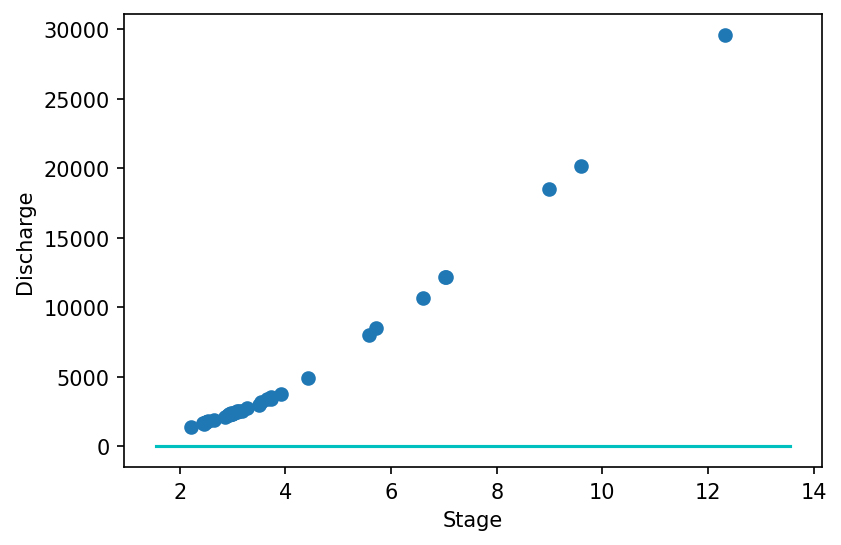

In [652]:
from matplotlib import pyplot as plt

#s_range = torch.arange(t_s.min()*0.9, t_s.max()*1.1).unsqueeze(1)
s_range = torch.linspace(t_s.min()*0.7, t_s.max()*1.1, steps=400).unsqueeze(1)
fig = plt.figure(dpi=150)
plt.xlabel("Stage")
plt.ylabel("Discharge")
#plt.ylim(0,6000)
#plt.xlim(2.0,6.5)
plt.plot(t_s.numpy(), t_q.numpy(), 'o')
plt.plot(s_range.numpy(), model(s_range).detach().numpy(), 'c-')
#plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

In [617]:
t_s.min()

tensor(2.2100)

In [620]:
model(0.0)

tensor([[646.4855]], grad_fn=<MmBackward>)

In [616]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data)

weights tensor([[ 1.3449],
        [ 1.3443],
        [ 1.6703],
        [-1.5198]])
offsets tensor([[2.4964],
        [2.4994],
        [0.3607],
        [6.4121]])
bias tensor([[ 4.5313],
        [ 4.8441],
        [ 6.0559],
        [-6.6554]])


In [219]:
model(torch.tensor([-1]))

tensor(5.4215, grad_fn=<ExpBackward>)

In [ ]:
class RatingRegressor: #Rename RatingModel
    def __init__(self, width=10, droprate=0.2, \
                 max_epoch=5000, lr=0.0001, weight_decay=1e-6):
        self.max_epoch = max_epoch
        self.lr = lr
        self.model = Rating_Layer(hidden_layers=hidden_layers, droprate=droprate, activation=activation)
        #self.model.cuda() #check if cuda available
        self.criterion = nn.MSELoss()#.cuda()
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr, weight_decay=weight_decay)
        
    def fit(self, x_train, y_train, x_sigma=torch.tensor(0.), y_sigma=torch.tensor(0.), verbose=True, log=True):
        # TODO assert correct dimensions
        # TODO verify noise is working as expected, if not move tranform outside of loop
        # TOOD cuda-fy (#print warning if no GPU found and verbose)
        
        # Setup transformations
        self.x_transform = Transform(x_train, log=log)
        self.y_transform = Transform(y_train, log=log)

        #X = Variable(torch.from_numpy(X_train).type(torch.FloatTensor))#.cuda()
        #y = Variable(torch.from_numpy(y_train).type(torch.FloatTensor))#.cuda()
        print(self.model)
        
        for epoch in range(1,self.max_epoch+1):
            self.optimizer.zero_grad()
            # add measurement uncertainty
            x = self.x_transform.transform(x_train + x_sigma*torch.randn(x_train.shape))
            y = self.y_transform.transform(y_train + y_sigma*torch.randn(y_train.shape)) #set type and send to cuda?
            
            outputs = self.model(x) #XXX TODO verify that this is making a difference
            loss = self.criterion(outputs, y) #XXX verify this too
            loss.backward()
            self.optimizer.step()
            if verbose:
                #if epoch == 3000:
                    #import pdb; pdb.set_trace()
                if epoch == 1 or epoch % 1000 == 0:
                    print('Epoch {} loss: {}'.format(epoch, loss.data))##[0]))
        return self

In [160]:
t_s_ln = normalize(t_s.log())
t_q_ln = normalize(t_q.log())

In [161]:
torch.tensor(0.)

tensor(0.)

In [202]:
# TODO fix loss function and forward
class MLP(nn.Module):
    def __init__(self, hidden_layers=[528, 528, 528], droprate=0.2, activation='relu'):
        super(MLP, self).__init__()
        self.model = nn.Sequential()
        self.model.add_module('input', nn.Linear(1, hidden_layers[0]))
        if activation == 'relu':
            self.model.add_module('relu0', nn.ReLU())
        elif activation == 'tanh':
            self.model.add_module('tanh0', nn.Tanh())
        for i in range(len(hidden_layers)-1):
            self.model.add_module('dropout'+str(i+1), nn.Dropout(p=droprate))
            self.model.add_module('hidden'+str(i+1), nn.Linear(hidden_layers[i], hidden_layers[i+1]))
            if activation == 'relu':
                self.model.add_module('relu'+str(i+1), nn.ReLU())
            elif activation == 'tanh':
                self.model.add_module('tanh'+str(i+1), nn.Tanh())
        self.model.add_module('dropout'+str(i+2), nn.Dropout(p=droprate))
        self.model.add_module('final', nn.Linear(hidden_layers[i+1], 1))
        
    def forward(self, x):
        # XXX probably need to move transformations here
        return self.model(x)

class Transform():
    # XXX fix
    def __init__(self, x, log=True):
        self.log = log
        
        if self.log:
            x_t = torch.log(x)
        else:
            x_t = x
        
        self.mean = x_t.mean()
        self.std = x_t.std()

    
    def transform(self, x):
        if self.log:
            x_t = torch.log(x)
        else:
            x_t = x
            
        return (x_t - self.mean) / self.std
    
    def untransform(self, x_t):
        #return (torch.exp(x_t) * self.std) + self.mean
        x = x_t * self.std + self.mean
        
        if self.log:
            x = torch.exp(x)
        
        return x
        
    
class MLPRegressor: #Rename RatingModel
    def __init__(self, hidden_layers=[528, 528, 528], droprate=0.2, activation='relu', \
                 max_epoch=10000, lr=0.0001, weight_decay=1e-6):
        self.max_epoch = max_epoch
        self.lr = lr
        self.model = MLP(hidden_layers=hidden_layers, droprate=droprate, activation=activation)
        #self.model.cuda() #check if cuda available
        self.criterion = nn.MSELoss()#.cuda()
        self.optimizer = optim.Adam(self.model.parameters(), lr=lr, weight_decay=weight_decay)
        
    def fit(self, x_train, y_train, x_sigma=torch.tensor(0.), y_sigma=torch.tensor(0.), verbose=True, log=True):
        # TODO assert correct dimensions
        # TODO verify noise is working as expected, if not move tranform outside of loop
        # TOOD cuda-fy (#print warning if no GPU found and verbose)
        
        # Setup transformations
        self.x_transform = Transform(x_train, log=log)
        self.y_transform = Transform(y_train, log=log)

        #X = Variable(torch.from_numpy(X_train).type(torch.FloatTensor))#.cuda()
        #y = Variable(torch.from_numpy(y_train).type(torch.FloatTensor))#.cuda()
        print(self.model)
        
        for epoch in range(1,self.max_epoch+1):
            self.optimizer.zero_grad()
            # add measurement uncertainty
            x = self.x_transform.transform(x_train + x_sigma*torch.randn(x_train.shape))
            y = self.y_transform.transform(y_train + y_sigma*torch.randn(y_train.shape)) #set type and send to cuda?
            
            outputs = self.model(x) #XXX TODO verify that this is making a difference
            loss = self.criterion(outputs, y) #XXX verify this too
            loss.backward()
            self.optimizer.step()
            if verbose:
                #if epoch == 3000:
                    #import pdb; pdb.set_trace()
                if epoch == 1 or epoch % 1000 == 0:
                    print('Epoch {} loss: {}'.format(epoch, loss.data))##[0]))
        return self
    
    def predict(self, x, n=1000, on='cpu'):
        # run on cpu by default
        self.model.train() # should I overwrite?
        x_t = self.x_transform.transform(x)
        #y_t_hat = np.array([self.model(x_t).data.cpu().numpy() for _ in range(n)]).squeeze()
        y_t_hat = torch.tensor([self.model(x_t).data.cpu().numpy() for _ in range(n)]).squeeze()
        self.model.eval()
        #y_t_mle = self.model(x_t).data.cpu().numpy()
        y_t_mle = self.model(x_t).data.cpu()
        self.model.train()
        y_hat = self.y_transform.untransform(y_t_hat).numpy() #transform expects tensor, so transform then convert to numpy
        y_mle = self.y_transform.untransform(y_t_mle).numpy()
        return y_hat#, y_mle
        
    def load(self, filename):
        return
    

In [207]:
### Below is training code, uncomment to train your own model... ###
### Note: You need GPU and CUDA to run this section ###
'''
# Define networks
mlp2 = [MLP2Regressor(activation='relu'),
        MLP2Regressor(activation='tanh')]
        
# Training, set verbose=True to see loss after each epoch.
[mlp.fit(X_train, y_train,verbose=False) for mlp in mlp2]

# Save torch models
for ind, mlp in enumerate(mlp2):
    torch.save(mlp.model, 'co2_mlp2_'+str(ind)+'.pth')
'''

#hidden_layers = [528, 256, 256]
width = 528
width = 1054
#mpl2 = MLP2Regressor(hidden_layers=[528,528,528], droprate=0.2, max_epoch=5000, activation='relu')
#mpl2 = MLPRegressor(hidden_layers=[528,528,528,528], droprate=0.2, max_epoch=5000, activation='relu')
mpl2 = MLPRegressor(hidden_layers=[width, width, width], droprate=0.2, max_epoch=5000, activation='relu')
mpl2.fit(t_s, t_q,verbose=True, log=False) #XXX move log to regressor

#torch.save(mlp2.model, 'filename')

MLP(
  (model): Sequential(
    (input): Linear(in_features=1, out_features=1054, bias=True)
    (relu0): ReLU()
    (dropout1): Dropout(p=0.2, inplace=False)
    (hidden1): Linear(in_features=1054, out_features=1054, bias=True)
    (relu1): ReLU()
    (dropout2): Dropout(p=0.2, inplace=False)
    (hidden2): Linear(in_features=1054, out_features=1054, bias=True)
    (relu2): ReLU()
    (dropout3): Dropout(p=0.2, inplace=False)
    (final): Linear(in_features=1054, out_features=1, bias=True)
  )
)
Epoch 1 loss: 0.9985376596450806
Epoch 1000 loss: 0.0035758940503001213
Epoch 2000 loss: 0.009635384194552898
Epoch 3000 loss: 0.0014826484257355332
Epoch 4000 loss: 0.004357919562608004
Epoch 5000 loss: 0.001417858642525971


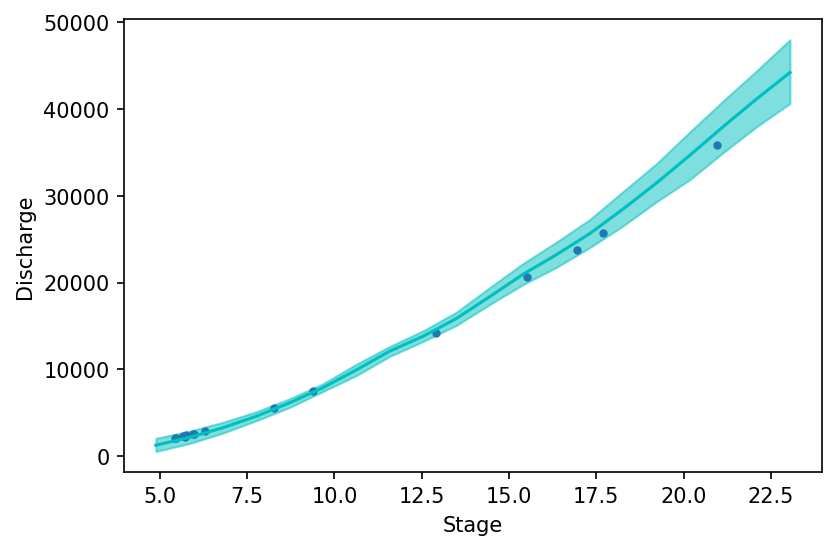

In [208]:
# plot
# colorado river
from matplotlib import pyplot as plt
s_n_range = torch.linspace(t_s.min()*0.9, t_s.max()*1.1, steps=20).unsqueeze(1)

y_hat = mpl2.predict(s_n_range, n=1000)
y = y_hat.mean(axis=0)
y_upper = np.quantile(y_hat, 0.975, axis=0)
y_lower = np.quantile(y_hat, 0.025, axis=0)

fig = plt.figure(dpi=150)
plt.xlabel("Stage")
plt.ylabel("Discharge")


plt.plot(t_s.numpy(), t_q.numpy(), 'o', ms=3)
plt.plot(s_n_range.numpy(), y, 'c-')
plt.fill_between(s_n_range.numpy().flatten(), y1=y_upper, y2=y_lower, alpha=0.5, color='c')
#y_relu_mc_std = y_hat.std(axis=0)

In [234]:
stage = data['stage']

In [241]:
stage.max()

20.95

In [320]:
## fake some data
import  pandas as pd
data = pd.read_csv('../data/co_channel.csv')
t_s = torch.tensor(data['stage']).float().unsqueeze(1)
t_q = torch.tensor(data['q']).float().unsqueeze(1)

#hidden_layers = [528, 256, 256]
# best so far is 528*2 yields 0.002 score
width = 3000 #528 seems best
depth = 2
dropout = 0.2
hidden_layers = [width] * depth

#mpl2 = MLP2Regressor(hidden_layers=[528,528,528], droprate=0.2, max_epoch=5000, activation='relu')
mpl2 = MLPRegressor(hidden_layers=hidden_layers, droprate=dropout, max_epoch=5000, activation='relu')
mpl2.fit(t_s, t_q,verbose=True, log=True) #XXX move log to regressor


MLP(
  (model): Sequential(
    (input): Linear(in_features=1, out_features=3000, bias=True)
    (relu0): ReLU()
    (dropout1): Dropout(p=0.2, inplace=False)
    (hidden1): Linear(in_features=3000, out_features=3000, bias=True)
    (relu1): ReLU()
    (dropout2): Dropout(p=0.2, inplace=False)
    (final): Linear(in_features=3000, out_features=1, bias=True)
  )
)
Epoch 1 loss: 0.9256328344345093
Epoch 1000 loss: 0.005467010196298361
Epoch 2000 loss: 0.0009506205096840858
Epoch 3000 loss: 0.0008461237302981317
Epoch 4000 loss: 0.00038290367228910327
Epoch 5000 loss: 0.0024151750840246677


(array([1.000e+00, 1.000e+00, 1.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        1.100e+01, 1.100e+01, 1.900e+01, 3.000e+01, 3.600e+01, 5.500e+01,
        7.500e+01, 6.200e+01, 9.900e+01, 1.290e+02, 1.770e+02, 2.300e+02,
        3.240e+02, 4.120e+02, 5.270e+02, 7.110e+02, 8.440e+02, 1.054e+03,
        1.337e+03, 1.423e+03, 1.422e+03, 1.384e+03, 1.142e+03, 9.110e+02,
        7.330e+02, 5.140e+02, 4.050e+02, 3.090e+02, 2.090e+02, 1.380e+02,
        9.400e+01, 5.200e+01, 3.800e+01, 2.600e+01, 1.500e+01, 8.000e+00,
        8.000e+00, 4.000e+00, 4.000e+00, 2.000e+00, 3.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00]),
 array([-0.210392  , -0.20223504, -0.1940781 , -0.18592115, -0.1777642 ,
        -0.16960725, -0.16145031, -0.15329336, -0.14513642, -0.13697946,
        -0.12882252, -0.12066557, -0.11250862, -0.10435167, -0.09619472,
        -0.08803777, -0.07988083, -0.07172388, -0.06356693, -0.05540998,
        -0.04725304, -0.03909609, -0.03093914, -0.02278219, -0.01462524,
        -0.

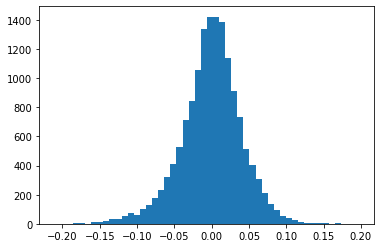

In [321]:
# plot

from matplotlib import pyplot as plt
s_n_range = t_s
y_hat = mpl2.predict(s_n_range, n=1000)
y = y_hat.mean(axis=0)

#XXX TODO transform to Z scores
error = torch.log(t_q) - np.log(y_hat.T)
out = error.flatten().numpy()
plt.hist(out, bins=50)

In [322]:
n

0.0

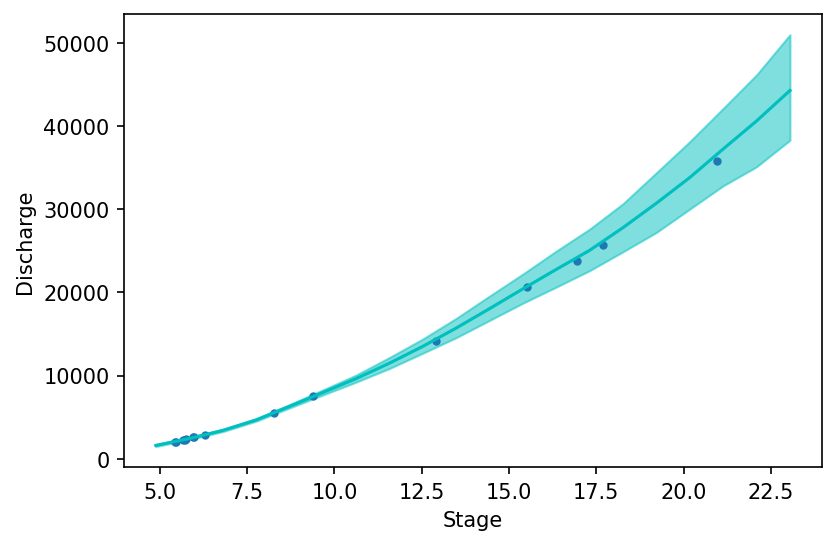

In [323]:
# plot
# colorado river
from matplotlib import pyplot as plt
s_n_range = torch.linspace(t_s.min()*0.9, t_s.max()*1.1, steps=20).unsqueeze(1)

y_hat = mpl2.predict(s_n_range, n=1000)
y = y_hat.mean(axis=0)
y_upper = np.quantile(y_hat, 0.975, axis=0)
y_lower = np.quantile(y_hat, 0.025, axis=0)

fig = plt.figure(dpi=150)
plt.xlabel("Stage")
plt.ylabel("Discharge")

#plt.xlim(5,10)
#plt.ylim(0,10000)

plt.plot(t_s.numpy(), t_q.numpy(), 'o', ms=3)
plt.plot(s_n_range.numpy(), y, 'c-')
plt.fill_between(s_n_range.numpy().flatten(), y1=y_upper, y2=y_lower, alpha=0.5, color='c')
#y_relu_mc_std = y_hat.std(axis=0)

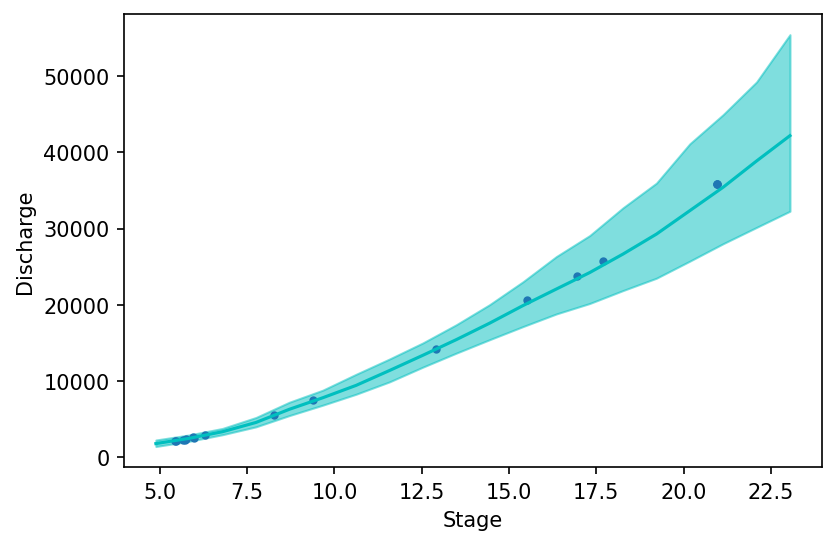

In [292]:
# plot
# colorado river fake
from matplotlib import pyplot as plt
s_n_range = torch.linspace(t_s.min()*0.9, t_s.max()*1.1, steps=20).unsqueeze(1)

y_hat = mpl2.predict(s_n_range, n=1000)
y = y_hat.mean(axis=0)
y_upper = np.quantile(y_hat, 0.975, axis=0)
y_lower = np.quantile(y_hat, 0.025, axis=0)

fig = plt.figure(dpi=150)
plt.xlabel("Stage")
plt.ylabel("Discharge")

#plt.xlim(5,10)
#plt.ylim(0,10000)
plt.plot(t_s.numpy(), t_q.numpy(), 'o', ms=3)
plt.plot(s_n_range.numpy(), y, 'c-')
plt.fill_between(s_n_range.numpy().flatten(), y1=y_upper, y2=y_lower, alpha=0.5, color='c')
#y_relu_mc_std = y_hat.std(axis=0)

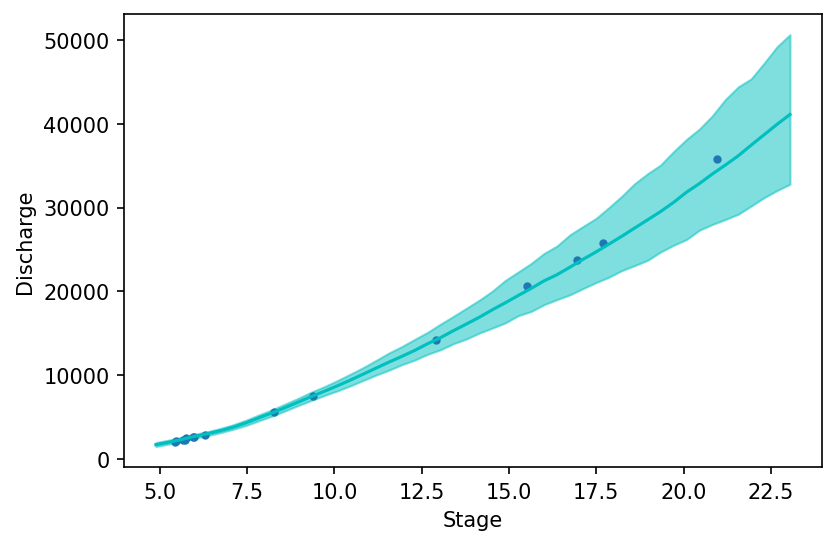

In [174]:
# plot
# green reiver
from matplotlib import pyplot as plt
s_n_range = torch.linspace(t_s.min()*0.9, t_s.max()*1.1, steps=50).unsqueeze(1)

y_hat = mpl2.predict(s_n_range, n=2000)
y = y_hat.mean(axis=0)
y_upper = np.quantile(y_hat, 0.975, axis=0)
y_lower = np.quantile(y_hat, 0.025, axis=0)

fig = plt.figure(dpi=150)
plt.xlabel("Stage")
plt.ylabel("Discharge")


plt.plot(t_s.numpy(), t_q.numpy(), 'o', ms=3)
plt.plot(s_n_range.numpy(), y, 'c-')
plt.fill_between(s_n_range.numpy().flatten(), y1=y_upper, y2=y_lower, alpha=0.5, color='c')
#y_relu_mc_std = y_hat.std(axis=0)

In [146]:


s_n_range = torch.linspace(t_s_ln.min()*0.9, t_s_ln.max()*1.1, steps=20).unsqueeze(1)
s_n_relu_pred, y_hat = predict_reg(mpl2, s_n_range)
y_mu = y_hat.mean(axis=0)
y_std = y_hat.std(axis=0)

fig = plt.figure(dpi=150)
plt.xlabel("Stage")
plt.ylabel("Discharge")


plt.plot(t_s_ln.numpy(), t_q_ln.numpy(), 'o')
plt.plot(s_n_range.numpy(), y_mu, 'c-')
plt.fill_between(s_n_range.numpy().flatten(), y1=y_mu + 1.96*y_std, y2=y_mu - 1.96*y_std, alpha=0.5, color='c')
#plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

array([12329.015 ,  4993.4385,  2351.3577,  2295.0469,  2316.6318,
        2489.3545,  1697.4719,  1800.7755,  2177.0637,  3101.916 ,
       20763.828 ,  8240.167 ,  1413.3885,  2593.006 ,  2490.9766,
        1745.3494,  1930.5486,  2344.73  ,  2413.9739, 11079.205 ,
        3801.328 ,  2272.4402,  2262.6296,  3481.9944,  3064.5178,
        3499.2156,  2540.7517,  3349.8096, 18693.09  , 12510.251 ,
        8729.963 ,  2726.037 ,  2390.0684,  1746.8278,  1672.9391,
       30386.836 ], dtype=float32)

In [149]:
np.quantile(y_hat, 0.975, axis=0)

array([13805.77941895,  5298.10837402,  2457.41132202,  2398.14725952,
        2412.6605896 ,  2580.81318359,  1840.11071472,  1930.12709351,
        2309.08330688,  3210.98812866, 24981.15014648,  9283.04909668,
        1561.77999878,  2691.88939209,  2588.52041016,  1872.53797302,
        2064.54838867,  2459.57628174,  2529.86872559, 12418.2579834 ,
        3962.15195923,  2405.98359985,  2372.31858521,  3641.43936768,
        3195.0928894 ,  3680.50001831,  2665.67998657,  3492.81826782,
       22336.69912109, 14175.86547852,  9618.21203613,  2831.75936279,
        2498.38477173,  1858.44941406,  1829.84346619, 38268.34316406])

In [117]:
y

array([11.7325   ,  9.374648 ,  8.65147  ,  8.635521 ,  8.639269 ,
        8.687706 ,  8.490656 ,  8.50947  ,  8.60193  ,  8.852864 ,
       15.1019945, 10.354536 ,  8.425782 ,  8.716981 ,  8.685675 ,
        8.500274 ,  8.53742  ,  8.647137 ,  8.663926 , 11.315566 ,
        9.036872 ,  8.627061 ,  8.626301 ,  8.959358 ,  8.833855 ,
        8.962076 ,  8.696872 ,  8.933007 , 13.995409 , 11.794818 ,
       10.478416 ,  8.747455 ,  8.659281 ,  8.49631  ,  8.484071 ,
       19.167538 ], dtype=float32)

In [109]:
np.exp(y)

array([1.3016149e+05, 1.1654950e+04, 5.7210679e+03, 5.6165903e+03,
       5.6471836e+03, 5.9187280e+03, 4.8682832e+03, 4.9671191e+03,
       5.4510435e+03, 7.0206377e+03, 3.1214400e+06, 3.0856477e+04,
       4.5526108e+03, 6.0833467e+03, 5.9279131e+03, 4.8963506e+03,
       5.0940312e+03, 5.7030264e+03, 5.7920459e+03, 8.4614383e+04,
       8.4348789e+03, 5.5832339e+03, 5.5744341e+03, 7.7915303e+03,
       6.8946431e+03, 7.8348887e+03, 5.9842886e+03, 7.5720386e+03,
       1.3960022e+06, 1.2450694e+05, 3.6865199e+04, 6.2891914e+03,
       5.7482710e+03, 4.8917393e+03, 4.8482168e+03, 2.1885384e+08],
      dtype=float32)

In [104]:
y

array([11.776531 ,  9.363486 ,  8.651911 ,  8.63348  ,  8.638912 ,
        8.685877 ,  8.490497 ,  8.510595 ,  8.603562 ,  8.856609 ,
       14.953805 , 10.337102 ,  8.423456 ,  8.71331  ,  8.6874275,
        8.496245 ,  8.535825 ,  8.648752 ,  8.664241 , 11.34586  ,
        9.040131 ,  8.627523 ,  8.625946 ,  8.960793 ,  8.8385   ,
        8.966342 ,  8.696893 ,  8.932218 , 14.149123 , 11.732117 ,
       10.515023 ,  8.746588 ,  8.656654 ,  8.495303 ,  8.486366 ,
       19.203915 ], dtype=float32)

In [ ]:
# plot



In [83]:
mpl1 = MLPRegressor(hidden_layers=[528,528,528], droprate=0.2, max_epoch=5000, activation='relu')
mpl1.fit(t_s, t_q,verbose=True)

MLP(
  (model): Sequential(
    (input): Linear(in_features=1, out_features=528, bias=True)
    (relu0): ReLU()
    (dropout1): Dropout(p=0.2, inplace=False)
    (hidden1): Linear(in_features=528, out_features=528, bias=True)
    (relu1): ReLU()
    (dropout2): Dropout(p=0.2, inplace=False)
    (hidden2): Linear(in_features=528, out_features=528, bias=True)
    (relu2): ReLU()
    (dropout3): Dropout(p=0.2, inplace=False)
    (final): Linear(in_features=528, out_features=1, bias=True)
  )
)
Epoch 2 loss: 0.9237725734710693
Epoch 1001 loss: 0.00326955015771091
Epoch 2001 loss: 0.004237708169966936
Epoch 3001 loss: 0.006592483725398779
Epoch 4001 loss: 0.0031828221399337053
Epoch 5001 loss: 0.002376909600570798


In [49]:
mpl2.model.eval?

Signature: mpl2.model.eval() -> ~T
Docstring:
Sets the module in evaluation mode.

This has any effect only on certain modules. See documentations of
particular modules for details of their behaviors in training/evaluation
mode, if they are affected, e.g. :class:`Dropout`, :class:`BatchNorm`,
etc.

This is equivalent with :meth:`self.train(False) <torch.nn.Module.train>`.

See :ref:`locally-disable-grad-doc` for a comparison between
`.eval()` and several similar mechanisms that may be confused with it.

Returns:
    Module: self
File:      c:\users\thodson\appdata\local\programs\python\python39\lib\site-packages\torch\nn\modules\module.py
Type:      method


In [44]:
s_transform = Transform(t_s)

In [45]:
s_transform.transform(t_s)

tensor([[ 1.4826e+00],
        [ 4.0433e-01],
        [-5.1076e-01],
        [-5.5001e-01],
        [-5.3423e-01],
        [-4.3418e-01],
        [-9.6493e-01],
        [-8.9043e-01],
        [-6.1423e-01],
        [-1.2430e-01],
        [ 2.2045e+00],
        [ 9.4155e-01],
        [-1.2144e+00],
        [-3.7469e-01],
        [-4.3418e-01],
        [-9.2738e-01],
        [-7.9175e-01],
        [-5.1856e-01],
        [-4.7983e-01],
        [ 1.3323e+00],
        [ 1.1963e-01],
        [-5.5795e-01],
        [-5.6590e-01],
        [-2.2673e-03],
        [-1.4417e-01],
        [ 3.9817e-03],
        [-4.1169e-01],
        [-4.0117e-02],
        [ 2.0517e+00],
        [ 1.4792e+00],
        [ 9.9923e-01],
        [-3.0239e-01],
        [-4.9524e-01],
        [-9.3671e-01],
        [-9.8393e-01],
        [ 2.7852e+00]])

In [88]:
def predict_reg(model, X, T=1000):
    #X = Variable(torch.from_numpy(X).type(torch.FloatTensor).cuda())
    model = model.model
    model = model.train()
    Yt_hat = np.array([model(X).data.cpu().numpy() for _ in range(T)]).squeeze()
    model = model.eval()
    y_pred = model(X).data.cpu().numpy() #MLE estimate
    model = model.train()
    return y_pred, Yt_hat

In [89]:
y_relu_pred, y_hat = predict_reg(mpl2, t_s_ln)
y_relu_mc = y_hat.mean(axis=0)
y_relu_mc_std = y_hat.std(axis=0)

In [90]:
s_n_range.numpy().flatten()

array([-0.7526815 , -0.50778115, -0.2628808 , -0.01798046,  0.22691989,
        0.47182024,  0.7167206 ,  0.9616209 ,  1.2065213 ,  1.4514216 ,
        1.696322  ,  1.9412223 ,  2.1861227 ,  2.4310231 ,  2.6759233 ,
        2.9208236 ,  3.1657243 ,  3.4106247 ,  3.6555252 ,  3.9004254 ],
      dtype=float32)

In [29]:
from matplotlib import pyplot as plt

s_n_range = torch.linspace(t_s_ln.min()*0.9, t_s_ln.max()*1.1, steps=20).unsqueeze(1)
s_n_relu_pred, y_hat = predict_reg(mpl2, s_n_range)
y_mu = y_hat.mean(axis=0)
y_std = y_hat.std(axis=0)

fig = plt.figure(dpi=150)
plt.xlabel("Stage")
plt.ylabel("Discharge")


plt.plot(t_s_ln.numpy(), t_q_ln.numpy(), 'o')
plt.plot(s_n_range.numpy(), y_mu, 'c-')
plt.fill_between(s_n_range.numpy().flatten(), y1=y_mu + 1.96*y_std, y2=y_mu - 1.96*y_std, alpha=0.5, color='c')
#plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')

NameError: name 'predict_reg' is not defined

In [1]:
#t_s_ln = normalize(t_s.log())
#t_q_ln = normalize(t_q.log())
t_s_ln = normalize(t_s)
t_q_ln = normalize(t_q)

NameError: name 'normalize' is not defined

In [110]:

#hidden_layers = [256, 256, 256]
hidden_layers = [1056, 1056] # loss 0.0028
hidden_layers = [528, 528, 528]
mpl2 = MLP2Regressor(hidden_layers=hidden_layers, droprate=0.2, max_epoch=5000, activation='relu')
mpl2.fit(t_s_ln, t_q_ln,verbose=True)

MLP2(
  (model): Sequential(
    (input): Linear(in_features=1, out_features=528, bias=True)
    (relu0): ReLU()
    (dropout1): Dropout(p=0.2, inplace=False)
    (hidden1): Linear(in_features=528, out_features=528, bias=True)
    (relu1): ReLU()
    (dropout2): Dropout(p=0.2, inplace=False)
    (hidden2): Linear(in_features=528, out_features=528, bias=True)
    (relu2): ReLU()
    (dropout3): Dropout(p=0.2, inplace=False)
    (final): Linear(in_features=528, out_features=1, bias=True)
  )
)
Epoch 1 loss: 1.0849120616912842
Epoch 2 loss: 0.9725840091705322
Epoch 1001 loss: 0.006579444278031588
Epoch 2001 loss: 0.00392288388684392
Epoch 3001 loss: 0.005625448189675808
Epoch 4001 loss: 0.00488757761195302


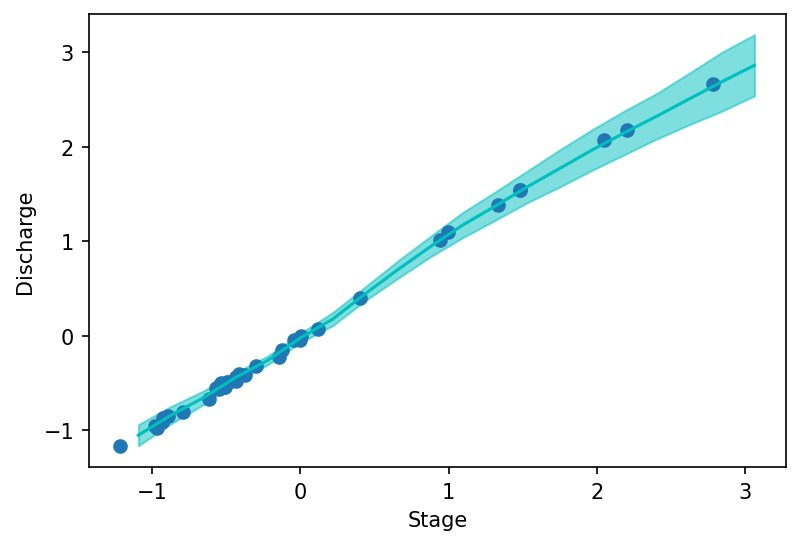

In [111]:
y_relu_pred, y_hat = predict_reg(mpl2, t_s_ln)
y_relu_mc = y_hat.mean(axis=0)
y_relu_mc_std = y_hat.std(axis=0)

from matplotlib import pyplot as plt

s_n_range = torch.linspace(t_s_ln.min()*0.9, t_s_ln.max()*1.1, steps=20).unsqueeze(1)
s_n_relu_pred, y_hat = predict_reg(mpl2, s_n_range)
y_mu = y_hat.mean(axis=0)
y_std = y_hat.std(axis=0)

fig = plt.figure(dpi=150)
plt.xlabel("Stage")
plt.ylabel("Discharge")


plt.plot(t_s_ln.numpy(), t_q_ln.numpy(), 'o')
plt.plot(s_n_range.numpy(), y_mu, 'c-')
plt.fill_between(s_n_range.numpy().flatten(), y1=y_mu + 1.96*y_std, y2=y_mu - 1.96*y_std, alpha=0.5, color='c')
#plt.plot(t_u.numpy(), seq_model(0.1 * t_u).detach().numpy(), 'kx')